# Importing dependencices

In [32]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
import seaborn as sns


# Data Collection 

In [129]:
big_mart_data = pd.read_csv('Train1.csv')

# Analysis

In [146]:
# fisrt 5 rows of the dataset
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Outlet_Type Grocery Store Supermarket Type1 Su...,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [147]:
# numbeer of data points & numbers OF Feature 
big_mart_data.shape

(8523, 12)

In [148]:
# getting some information about dataset
big_mart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


# Catagorical Feature 

- Item_Identifier
- Item_Fat_Content 
- Item_Type 
- Outlet_Identifier
- Outlet_Size
- Outlet_Location_Type
- Outlet_Type 

In [149]:
# checking missing values for the dataset 
big_mart_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

# Handeling Missing Values 

In [150]:
# Mean value of "Item_Weight " column
big_mart_data['Item_Weight'].mean()

np.float64(12.857645184135976)

In [151]:
# filling missing values  in the "Item_Weight " column with "Mean" value 
big_mart_data['Item_Weight'].fillna(big_mart_data['Item_Weight'].mean(), inplace = True)

C:\Users\soumy\AppData\Local\Temp\ipykernel_2544\385809641.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  big_mart_data['Item_Weight'].fillna(big_mart_data['Item_Weight'].mean(), inplace = True)


In [152]:
# checking missing values for the dataset 
big_mart_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [153]:
# Replace the missing value in "Outlet_Size" with the mode based on "Outlet_Type"
mode_of_outlet_size = big_mart_data.pivot_table(values='Outlet_Size', columns ='Outlet_Type', aggfunc=lambda x: x.mode()[0])


In [154]:
print(mode_of_outlet_size )

Outlet_Type                     Grocery Store Supermarket Type1  \
Outlet_Size  [[Small, Small, Medium, Medium]]             Small   

Outlet_Type Supermarket Type2 Supermarket Type3  
Outlet_Size            Medium            Medium  


In [155]:
missing_values = big_mart_data['Outlet_Size'].isnull()

In [156]:
print(missing_values)

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool


In [157]:
big_mart_data.loc[missing_values, 'Outlet_Size'] = big_mart_data.loc[missing_values, 'Outlet_Type'].apply(lambda x: mode_of_outlet_size)


In [158]:
big_mart_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

# Agian Data Analysis 

In [159]:
big_mart_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Numerical Feature 

In [160]:
sns.set()

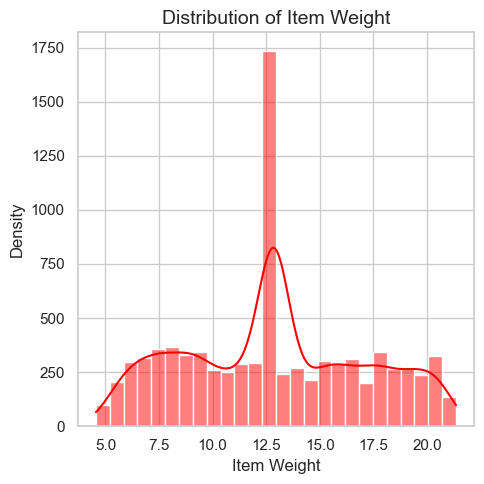

In [161]:
plt.figure(figsize=(5,5))
sns.set(style="whitegrid")
sns.histplot(big_mart_data['Item_Weight'], kde=True, color='red')
plt.title("Distribution of Item Weight", fontsize=14)
plt.xlabel("Item Weight")
plt.ylabel("Density")
plt.tight_layout()
plt.show()

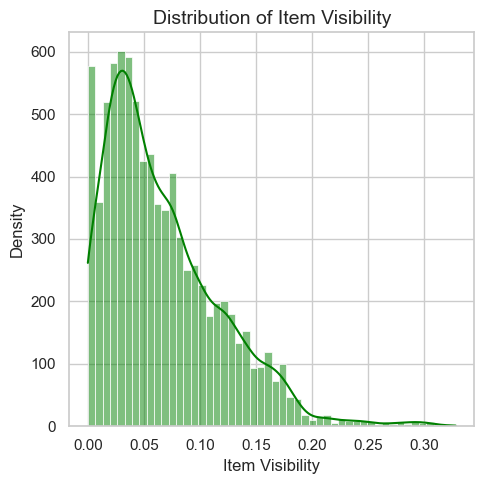

In [162]:
plt.figure(figsize=(5,5))
sns.set(style="whitegrid")
sns.histplot(big_mart_data['Item_Visibility'], kde=True, color='green')
plt.title("Distribution of Item Visibility", fontsize=14)
plt.xlabel("Item Visibility")
plt.ylabel("Density")
plt.tight_layout()
plt.show()

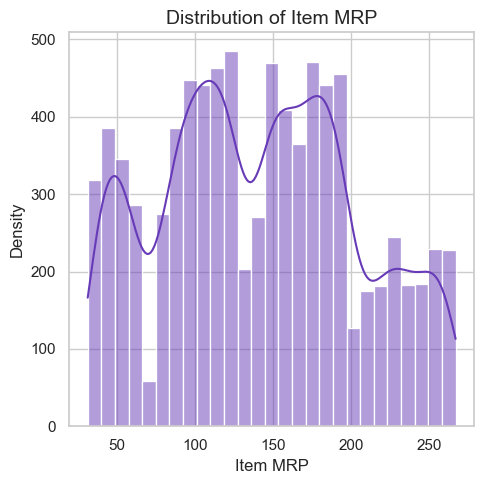

In [163]:
plt.figure(figsize=(5,5))
sns.set(style="whitegrid")
sns.histplot(big_mart_data['Item_MRP'], kde=True, color='#673AB7')
plt.title("Distribution of Item MRP", fontsize=14)
plt.xlabel("Item MRP")
plt.ylabel("Density")
plt.tight_layout()
plt.show()

C:\Users\soumy\AppData\Local\Temp\ipykernel_2544\3407689565.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outlet_Establishment_Year', data=big_mart_data, palette='husl')


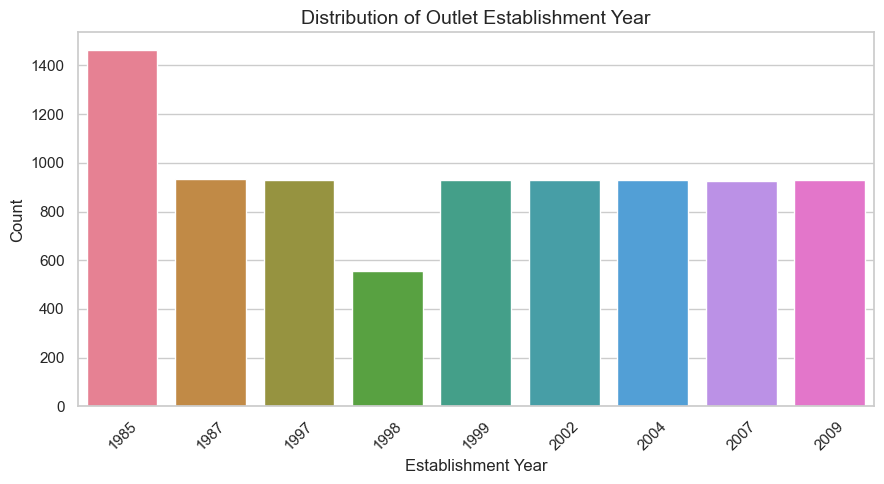

In [164]:
plt.figure(figsize=(9,5))
sns.set(style="whitegrid")
sns.countplot(x='Outlet_Establishment_Year', data=big_mart_data, palette='husl')
plt.title("Distribution of Outlet Establishment Year", fontsize=14)
plt.xlabel("Establishment Year")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\soumy\AppData\Local\Temp\ipykernel_2544\769499658.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Item_Fat_Content', data=big_mart_data, palette='husl')


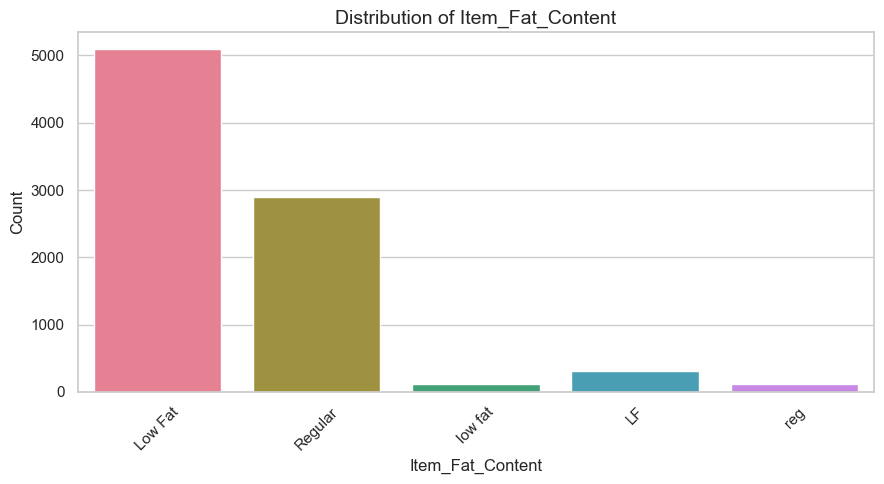

In [165]:
# "Item_Fat_Content"
plt.figure(figsize=(9,5))
sns.set(style="whitegrid")
sns.countplot(x='Item_Fat_Content', data=big_mart_data, palette='husl')
plt.title("Distribution of Item_Fat_Content", fontsize=14)
plt.xlabel("Item_Fat_Content")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\soumy\AppData\Local\Temp\ipykernel_2544\2650170068.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Item_Type', data=big_mart_data, palette='husl')


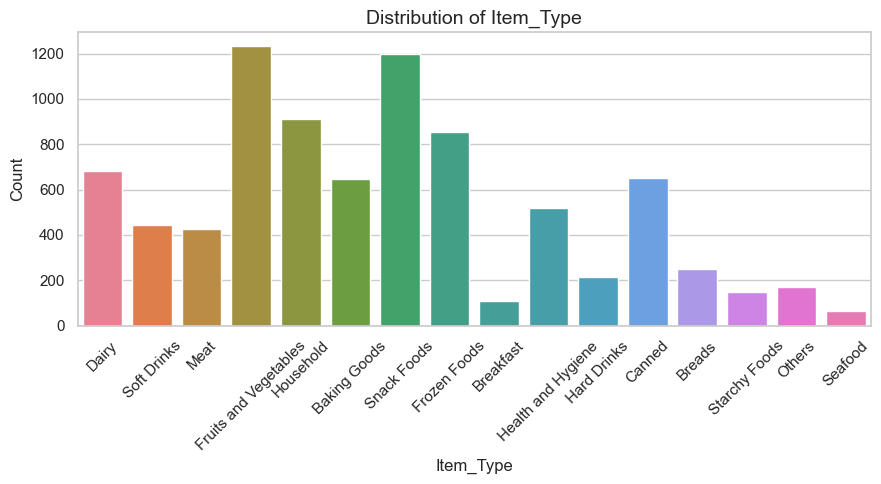

In [166]:
# "Item_Type"
plt.figure(figsize=(9,5))
sns.set(style="whitegrid")
sns.countplot(x='Item_Type', data=big_mart_data, palette='husl')
plt.title("Distribution of Item_Type", fontsize=14)
plt.xlabel("Item_Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\soumy\AppData\Local\Temp\ipykernel_2544\3952997990.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outlet_Size', data=big_mart_data, palette='husl')


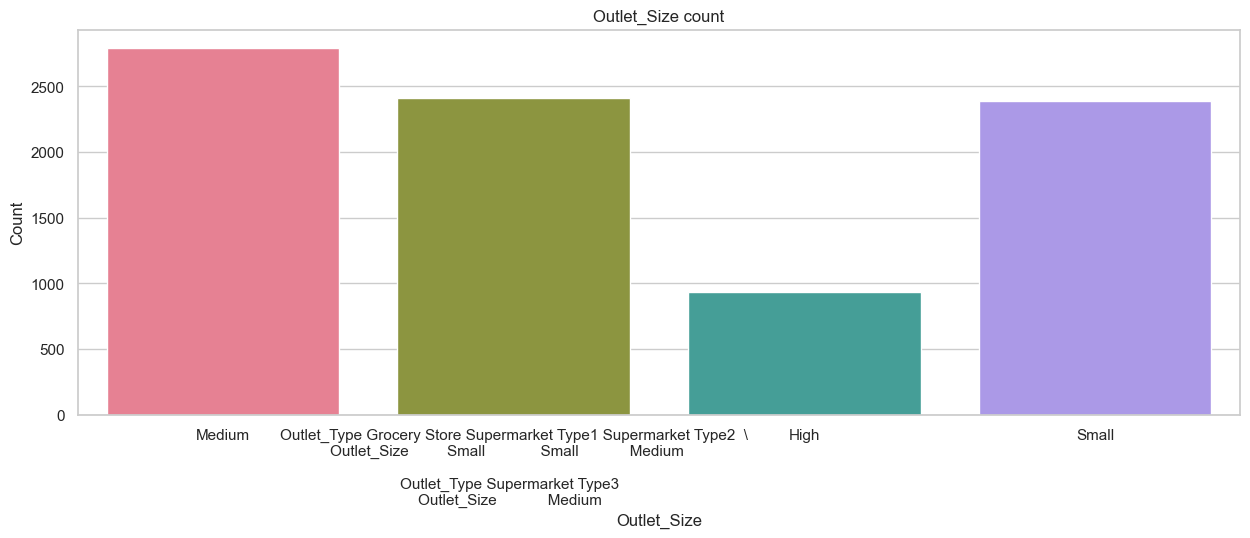

In [167]:
# "Outlet_Size"
big_mart_data['Outlet_Size'] = big_mart_data['Outlet_Size'].astype(str)
big_mart_data['Outlet_Size'] = big_mart_data['Outlet_Size'].replace('nan', 'Missing')

plt.figure(figsize=(15,5))
sns.set(style="whitegrid")
sns.countplot(x='Outlet_Size', data=big_mart_data, palette='husl')
plt.title("Outlet_Size count")
plt.xlabel("Outlet_Size")
plt.ylabel("Count")
plt.show()



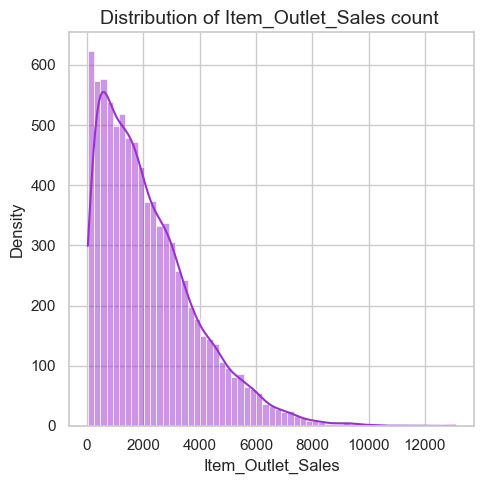

In [173]:
# Item_Outlet_Sales
plt.figure(figsize=(5,5))
sns.set(style="whitegrid")
sns.histplot(big_mart_data['Item_Outlet_Sales'], kde=True, color='#9931CC')
plt.title("Distribution of Item_Outlet_Sales count ", fontsize=14)
plt.xlabel("Item_Outlet_Sales")
plt.ylabel("Density")
plt.tight_layout()
plt.show()

# Data Pre processing 

In [174]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Outlet_Type Grocery Store Supermarket Type1 Su...,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [175]:
big_mart_data['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [180]:
big_mart_data['Item_Fat_Content'] = big_mart_data['Item_Fat_Content'].str.strip().str.lower()
big_mart_data.replace({'Item_Fat_Content': {'low fat': 'Low Fat', 'lf': 'Low Fat', 'reg': 'Regular'}}, inplace=True)
print(big_mart_data['Item_Fat_Content'].value_counts())


Item_Fat_Content
Low Fat    5517
regular    3006
Name: count, dtype: int64


In [181]:
big_mart_data['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
regular    3006
Name: count, dtype: int64

# Label Encoding 

In [182]:
encoder =  LabelEncoder()

In [183]:
big_mart_data['Item_Identifier'] = encoder.fit_transform(big_mart_data['Item_Identifier'])
big_mart_data['Item_Fat_Content'] = encoder.fit_transform(big_mart_data['Item_Fat_Content'])
big_mart_data['Item_Type'] = encoder.fit_transform(big_mart_data['Item_Type'])
big_mart_data['Outlet_Identifier'] = encoder.fit_transform(big_mart_data['Outlet_Identifier'])
big_mart_data['Outlet_Size'] = encoder.fit_transform(big_mart_data['Outlet_Size'])
big_mart_data['Outlet_Location_Type'] = encoder.fit_transform(big_mart_data['Outlet_Location_Type'])
big_mart_data['Outlet_Type'] = encoder.fit_transform(big_mart_data['Outlet_Type'])

In [184]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


# Splitting Feature and Target 

In [185]:
X = big_mart_data.drop(columns='Item_Outlet_Sales', axis=1)
Y = big_mart_data['Item_Outlet_Sales']

In [186]:
print(X)

      Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0                 156        9.300                 0         0.016047   
1                   8        5.920                 1         0.019278   
2                 662       17.500                 0         0.016760   
3                1121       19.200                 1         0.000000   
4                1297        8.930                 0         0.000000   
...               ...          ...               ...              ...   
8518              370        6.865                 0         0.056783   
8519              897        8.380                 1         0.046982   
8520             1357       10.600                 0         0.035186   
8521              681        7.210                 1         0.145221   
8522               50       14.800                 0         0.044878   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0             4  249.8092                  9    

print(Y)

# Splitting the data into Training data & Testing Data

In [188]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [189]:
print(X.shape, X_train.shape, X_test.shape)

(8523, 11) (6818, 11) (1705, 11)


# ML Model Training 

In [190]:
regressor = XGBRegressor()

In [191]:
regressor.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [192]:
# prediction on training data
training_data_prediction = regressor.predict(X_train)

In [193]:
# R squared Value
r2_train = metrics.r2_score(Y_train, training_data_prediction)

In [194]:
print('R Squared value = ', r2_train)

R Squared value =  0.879565708425905


In [195]:
# prediction on test data
test_data_prediction = regressor.predict(X_test)

In [196]:
# R squared Value
r2_test = metrics.r2_score(Y_test, test_data_prediction)

In [197]:
print('R Squared value = ', r2_test)

R Squared value =  0.5075841838320172


# Prophet

In [198]:
!pip install prophet

Defaulting to user installation because normal site-packages is not writeable
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   - -------------------------------------- 0.5/13.3 MB 2.3 MB/s eta 0:00:06
   --- ------------------------------------ 1.3/13.3 MB 3.2 MB/s eta 0:00:04
   ---- ----------------------------------- 1.6/13.3 MB 3.1 MB/s eta 0:00:04
   ------ --------------------------------- 2.1/13.3 MB 2.6 MB/s eta 0:00:05
   ---------- ----------------------------- 3.4/13.3 MB 3.4 MB/s eta 0:00:03
   ----------- ---------------------------- 3.9/13.3 MB 3.2 MB/s eta 0:00:03
   -------------- ------------------------- 4.7/13.3 MB 3.4 MB/s eta 0:00:03
   ------------------ --------------------- 6.0/13.3 MB 3.7 MB/s eta 0:00:02
   ---------------------- ----------------- 7.3/13.3 MB 4.0 MB/s eta 0:00:02
   ------------------------- -------------- 8.7/13.3 MB 4.3 MB/s eta 0:00:02
   ------------------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [215]:
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from math import sqrt


In [216]:
df = pd.read_csv("Train1.csv")

In [217]:
print(df.columns)


Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')


In [218]:
months = pd.date_range(start='2010-01-01', periods=60, freq='MS')


In [219]:
df = df.sample(n=60, random_state=42).reset_index(drop=True)
df['Date'] = months

In [220]:
sales_ts = df[['Date', 'Item_Outlet_Sales']].copy()
sales_ts.columns = ['ds', 'y']

In [221]:
model = Prophet()
model.fit(sales_ts)


15:16:16 - cmdstanpy - INFO - Chain [1] start processing
15:16:16 - cmdstanpy - INFO - Chain [1] done processing


In [222]:
future = model.make_future_dataframe(periods=12, freq='MS')
forecast = model.predict(future)


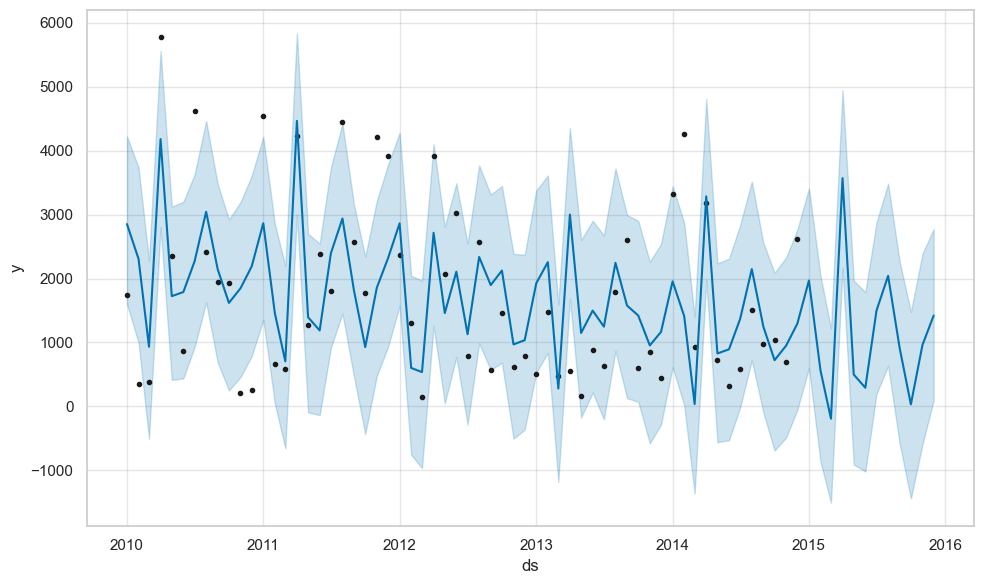

<Figure size 500x500 with 0 Axes>

In [223]:
model.plot(forecast)
plt.figure(figsize=(5,5))
plt.show()


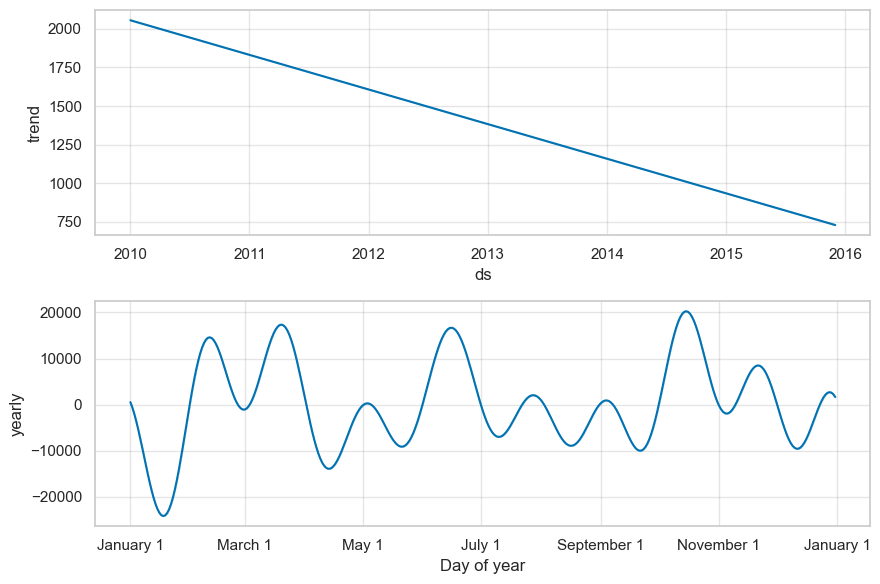

<Figure size 500x500 with 0 Axes>

In [224]:
model.plot_components(forecast)
plt.figure(figsize=(5,5))
plt.show()

In [225]:
merged = pd.merge(sales_ts, forecast[['ds', 'yhat']], on='ds', how='left')
merged = merged.dropna()

In [227]:
mae = mean_absolute_error(merged['y'], merged['yhat'])
mse = mean_squared_error(merged['y'], merged['yhat'])
rmse = sqrt(mse)


In [228]:
print("MAE:", mae)
print("RMSE:", rmse)

MAE: 880.3322783561202
RMSE: 1093.5380426729137
